# Trabajo Práctico Datos (75.06) - Análisis exploratorio de datos


El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en R o Python Pandas.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado.

La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? ¿Descubrieron cosas que pueden ser de interés las personas que estén pensando en realizar alguna operación inmobiliaria, o a empresa Properati?


In [13]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pev : propiedades en venta. dataset completo

metadata_pev = pd.read_csv('/home/nicolas/env/properati-AR-2017-08-01-properties-sell.csv')
metadata_pev.head(10)


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...
5,4d3b492ed5f9c74cdf33b56b98328e5c950e3f9c,2013-01-04,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,"-34.429071,-58.795418",...,54.0,NaN,1796.296296,NaN,2.0,NaN,http://www.properati.com.ar/518a_venta_departa...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Arcos de Pilar,https://thumbs4.properati.com/8/bJn9FqcBRGi_8H...
6,535441f569473f6e5d687c38b27d9b9c6e69e284,2013-01-09,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,"-34.4789383,-58.5214371",...,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/52p4_venta_local_s...,"Venta - Local - Argentina, Buenos Aires, Zona ...",Local en Venta ubicado en San Isidro,https://thumbs4.properati.com/9/ZCK2RkrsymyN5s...
7,7188b6176d94ef327da690749469b6065acd7426,2013-01-12,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.005526,-57.5460658",...,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/53yr_venta_terreno...,consta de: Hall entrada. Cocina separada y lav...,Departamento de 2 Ambientes a la calle con De...,https://thumbs4.properati.com/5/cdI5e-n_0jnv_p...
8,27d87ac71e7c00afa9fa7428b943ec263ff68bb4,2013-01-21,sell,house,San Martín de los Andes,|Argentina|Neuquén|San Martín de los Andes|,Argentina,Neuquén,3836951.0,"-40.0720454,-71.3002181",...,260.0,NaN,1846.153846,NaN,4.0,NaN,http://www.properati.com.ar/568j_venta_casa_sa...,"Venta - Casa - Argentina, Patagonia, San Marti...",Casa en Venta ubicado en Quilquihue,https://thumbs4.properati.com/4/CbyVVv7pjiv8mn...
9,df77a06585671e637d2d86f8d22b70d61cfecb18,2013-01-21,sell,house,San Ma

In [14]:
#187 mil observaciones
metadata_pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502

In [15]:
pev = metadata_pev.loc[metadata_pev.state_name.str.contains('Capital Federal' or 'G.B.A')]
pev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44152 entries, 4 to 187480
Data columns (total 27 columns):
id                            44152 non-null object
created_on                    44152 non-null object
operation                     44152 non-null object
property_type                 44152 non-null object
place_name                    44152 non-null object
place_with_parent_names       44152 non-null object
country_name                  44152 non-null object
state_name                    44152 non-null object
geonames_id                   42326 non-null float64
lat-lon                       34180 non-null object
lat                           34180 non-null float64
lon                           34180 non-null float64
price                         39480 non-null float64
currency                      39480 non-null object
price_aprox_local_currency    39480 non-null float64
price_aprox_usd               39480 non-null float64
surface_total_in_m2           35611 non-null float64

In [23]:
# Convertiremos la fecha de publicación
# Agregamos las series año y mes como columnas
import calendar
pev['Date'] = pd.to_datetime(pev['created_on'])
pev['Año'] = pev['Date'].map(lambda x:x.year)
pev['Mes'] = pev['Date'].map(lambda x:x.month)
pev.describe()

/home/nicolas/env/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/nicolas/env/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/nicolas/env/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Año,Mes
count,4.232600e+04,34180.000000,34180.000000,3.948000e+04,3.948000e+04,3.948000e+04,35611.000000,40507.000000,31758.000000,3.691500e+04,4652.000000,22271.000000,8.226000e+03,44152.000000,44152.000000
mean,3.534278e+06,-34.602148,-58.434966,3.993792e+05,5.016693e+06,2.843205e+05,144.533487,105.277582,2961.519810,5.910755e+03,14.844798,2.744152,5.798772e+03,2016.672336,6.322703
std,5.674487e+05,0.039371,0.056965,1.018515e+06,8.105535e+06,4.593803e+05,1354.370243,956.389554,3304.254381,2.130760e+04,85.643391,1.562357,1.562555e+05,0.665647,2.540212
min,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,5.103610e+03,0.000000,0.000000,10.951338,3.208556e+00,1.000000,1.000000,1.000000e+00,2012.000000,1.000000
25%,3.429760e+06,-34.621145,-58.464089,1.090000e+05,1.843444e+06,1.044770e+05,43.000000,39.000000,1869.828333,2.129680e+03,2.000000,1.000000,1.100000e+03,2017.000000,5.000000
50%,3.433775e+06,-34.602786,-58.435012,1.700000e+05,2.823120e+06,1.600000e+05,66.000000,57.000000,2400.000000,2.730000e+03,4.000000,3.000000,2.000000e+03,2017.000000,7.000000
75%,3.435874e+06,-34.583845,-58.401832,3.500000e+05,5.293332e+06,2.999990e+05,122.000000,103.000000,3035.714286,3.582001e+03,7.000000,4.000000,3.600000e+03,2017.000000,7.000000
max,6.693230e+06,-34.534530,-58.344687,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,2.600000e+06,2509.000000,22.000000,1.000150e+07,2017.000000,12.000000


## Cantidad de ventas por año

Analizaremos la cantidad de ventas por año

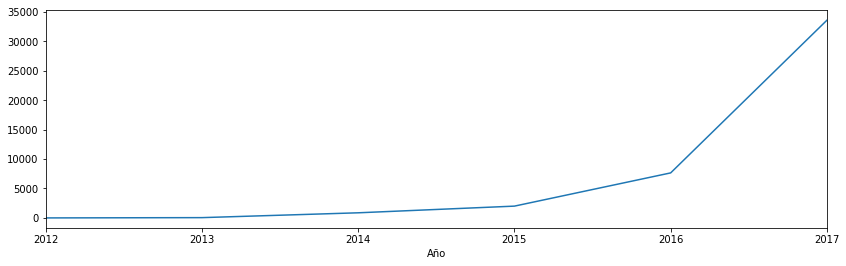

In [30]:
# este análisis no sirve para un carajo. habría que sacar el promedio de publicaciones por año en capital, 
# zona norte, sur y oeste

pev.groupby('Año').count()['id'].plot(figsize=(14,4));
